# Step 1: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Data Collection & Exploration

- Load the datasets

In [ ]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

/tmp/ipython-input-38-2906776592.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


- Explore the datasets

In [ ]:
print("Books:\n", books.head())

Books:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.ama

In [ ]:
print("Users:\n", users.head())

Users:
    User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [ ]:
print("Ratings:\n", ratings.head())

Ratings:
    User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [ ]:
print("Books Shape:", books.shape)
print("Users Shape:", users.shape)
print("Ratings Shape:", ratings.shape)

Books Shape: (271360, 8)
Users Shape: (278858, 3)
Ratings Shape: (1149780, 3)


- Summary statistics

In [ ]:
print("Books Summary:\n", books.describe(include='all'))

Books Summary:
               ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     020130998X  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/042509474X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/042509474X.0...  

In [ ]:
print("Users Summary:\n", users.describe(include='all'))

Users Summary:
              User-ID                         Location            Age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                              NaN       0.000000
25%      69715.25000                              NaN      24.000000
50%     139429.50000                              NaN      32.000000
75%     209143.75000                              NaN      44.000000
max     278858.00000                              NaN     244.000000


In [ ]:
print("Ratings Summary:\n", ratings.describe())

Ratings Summary:
             User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


# Step 3: Data Cleaning & Transformation

- Handle missing values

In [ ]:
books.dropna(subset=["Book-Title", "Book-Author", "ISBN"], inplace=True)
users.dropna(subset=["User-ID"], inplace=True)
ratings.dropna(subset=["User-ID", "ISBN", "Book-Rating"], inplace=True)

- Remove duplicates

In [ ]:
books.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)
ratings.drop_duplicates(inplace=True)

- Verify cleaning

In [ ]:
print("Missing Values (Books):\n", books.isnull().sum())
print("\n\nMissing Values (Users):\n", users.isnull().sum())
print("\n\nMissing Values (Ratings):\n", ratings.isnull().sum())

Missing Values (Books):
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


Missing Values (Users):
 User-ID          0
Location         0
Age         110762
dtype: int64


Missing Values (Ratings):
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


# Step 4: Exploratory Data Analysis (EDA)

# Top 10 Most Rated Books

In [ ]:
top_books = ratings['ISBN'].value_counts().head(10)
top_books

,count
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
044023722X,647
0679781587,639
0142001740,615
067976402X,614


In [ ]:
top_books_titles = books[books["ISBN"].isin(top_books.index)][["ISBN", "Book-Title"]].drop_duplicates()
top_books_titles

,ISBN,Book-Title
26,0971880107,Wild Animus
118,0671027360,Angels &amp; Demons
305,044023722X,A Painted House
356,0142001740,The Secret Life of Bees
408,0316666343,The Lovely Bones: A Novel
522,0312195516,The Red Tent (Bestselling Backlist)
748,0385504209,The Da Vinci Code
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel
1922,067976402X,Snow Falling on Cedars


In [ ]:
merged = top_books_titles.merge(top_books.rename("Counts"), left_on="ISBN", right_index=True)
merged

,ISBN,Book-Title,Counts
26,0971880107,Wild Animus,2502
118,0671027360,Angels &amp; Demons,586
305,044023722X,A Painted House,647
356,0142001740,The Secret Life of Bees,615
408,0316666343,The Lovely Bones: A Novel,1295
522,0312195516,The Red Tent (Bestselling Backlist),723
748,0385504209,The Da Vinci Code,883
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
1922,067976402X,Snow Falling on Cedars,614


/tmp/ipython-input-52-3340049392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Counts", y="Book-Title", data=merged, palette="mako")


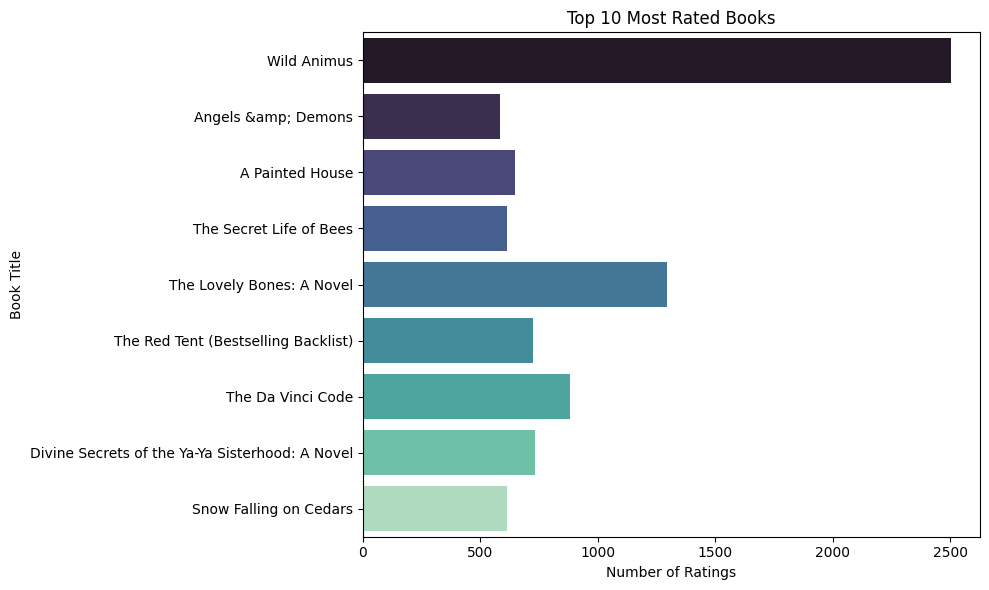

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Counts", y="Book-Title", data=merged, palette="mako")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

# Rating distribution

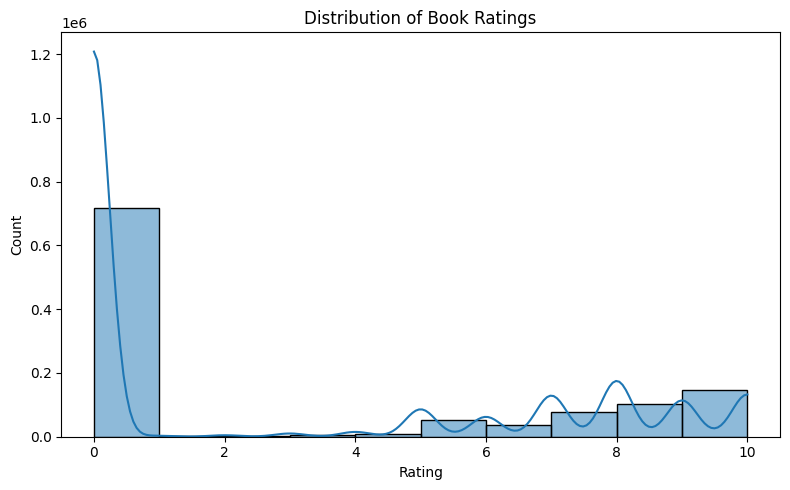

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings["Book-Rating"], bins=10, kde=True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# User Age distribution

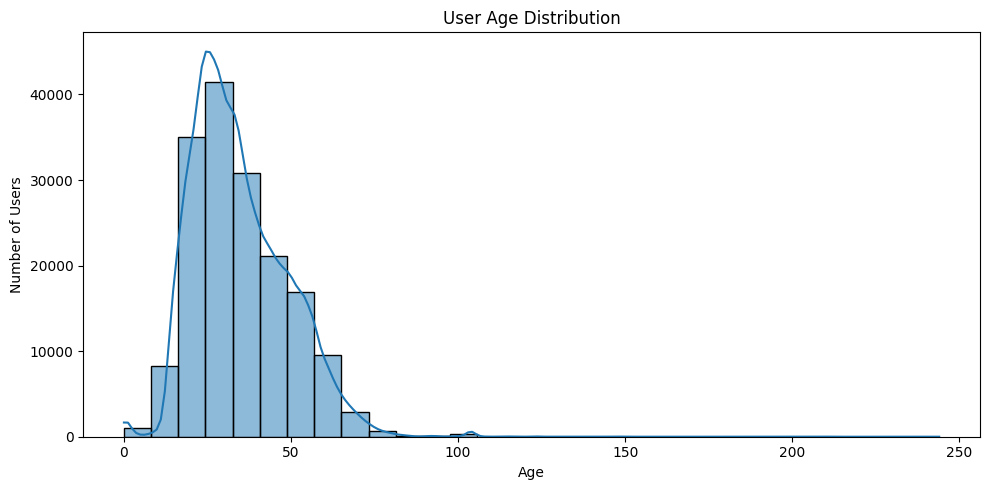

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(users["Age"].dropna(), bins=30, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

# Step 5: Feature Selection

- Merge ratings with book titles

In [ ]:
ratings_with_name = ratings.merge(books, on="ISBN")
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031129,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031130,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031131,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031132,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


- Filter users who rated more than 200 books

In [ ]:
x = ratings_with_name.groupby("User-ID").count()["Book-Rating"] > 200
active_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name["User-ID"].isin(active_users)]

- Filter books with at least 50 ratings

In [ ]:
y = filtered_rating.groupby("Book-Title").count()["Book-Rating"] >= 50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(famous_books)]

# Step 6: Model Development

- Create Pivot Table

In [2]:
pt = final_ratings.pivot_table(index="Book-Title", columns="User-ID", values="Book-Rating")
pt.fillna(0, inplace=True)

NameError: name 'final_ratings' is not defined

- Compute cosine similarity

In [ ]:
similarity_score = cosine_similarity(pt)

Step 7: Evaluation - Recommend Function

In [ ]:
def recommend(book_name):
    """Returns top 5 similar books to the given book."""
    try:
        index = np.where(pt.index == book_name)[0][0]
        similar_items = sorted(
            list(enumerate(similarity_score[index])),
            key=lambda x: x[1],
            reverse=True
        )[1:6]

        print(f"Recommendations for: {book_name}\n")
        for i in similar_items:
            print(pt.index[i[0]])
    except IndexError:
        print("Book not found in the system or not enough ratings!")

In [ ]:
similarity_score = [
    [1.00, 0.3, 0.2],
    [0.3, 1.00, 0.5],
    [0.2, 0.5, 1.00]
]
index = 1  # second book

enumerated = list(enumerate(similarity_score[index]))
# [(0, 0.3), (1, 1.00), (2, 0.5)]

sorted_output = sorted(enumerated, key=lambda x: x[1], reverse=True)
# [(1, 1.00), (2, 0.5), (0, 0.3)]

top_similar = sorted_output[1:6]
# [(2, 0.5), (0, 0.3)]

- Example Usage

In [ ]:
recommend("1984")

Recommendations for: 1984

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [ ]:
recommend("Message in a Bottle")

Recommendations for: Message in a Bottle

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


# Step 8: Popularity Based Recommendations

In [ ]:
num_of_rating_df = ratings_with_name.groupby("Book-Title").count()[["Book-Rating"]].reset_index()
num_of_rating_df.rename(columns={"Book-Rating": "num_ratings"}, inplace=True)

In [ ]:
avg_rating_df = ratings_with_name.groupby("Book-Title")["Book-Rating"].mean().reset_index()
avg_rating_df.rename(columns={"Book-Rating": "avg_ratings"}, inplace=True)

In [ ]:
popular_df = num_of_rating_df.merge(avg_rating_df, on="Book-Title")
popular_df = popular_df[popular_df["num_ratings"] >= 250].sort_values("avg_ratings", ascending=False).head(50)

In [ ]:
final_popular_books = popular_df.merge(books, on="Book-Title").drop_duplicates("Book-Title")[["Book-Title", "Book-Author", "Image-URL-M", "num_ratings", "avg_ratings"]]

In [ ]:
print("Top 10 Popular Books:\n")
print(final_popular_books[["Book-Title", "Book-Author", "num_ratings", "avg_ratings"]].head(10))


Top 10 Popular Books:

                                           Book-Title     Book-Author  \
0   Harry Potter and the Prisoner of Azkaban (Book 3)   J. K. Rowling   
3        Harry Potter and the Goblet of Fire (Book 4)   J. K. Rowling   
5      Harry Potter and the Sorcerer's Stone (Book 1)   J. K. Rowling   
9   Harry Potter and the Order of the Phoenix (Boo...   J. K. Rowling   
13   Harry Potter and the Chamber of Secrets (Book 2)   J. K. Rowling   
16  The Hobbit : The Enchanting Prelude to The Lor...  J.R.R. TOLKIEN   
17  The Fellowship of the Ring (The Lord of the Ri...  J.R.R. TOLKIEN   
26  Harry Potter and the Sorcerer's Stone (Harry P...   J. K. Rowling   
28     The Two Towers (The Lord of the Rings, Part 2)  J.R.R. TOLKIEN   
39                              To Kill a Mockingbird      Harper Lee   

    num_ratings  avg_ratings  
0           428     5.852804  
3           387     5.824289  
5           278     5.737410  
9           347     5.501441  
13          556   